### Assignment: ASSIGNMENT 6 <br> Name: Hotaling, Michael <br> Date: 2020-08-31


In [1]:
setwd("..")
setwd("..")

**Load the `data/r4ds/heights.csv` to `heights_df`**


In [2]:
heights_df <- read.csv("data/r4ds/heights.csv")
head(heights_df)

,earn,height,sex,ed,age,race
,<dbl>,<dbl>,<fct>,<int>,<int>,<fct>
1,50000,74.42444,male,16,45,white
2,60000,65.53754,female,16,58,white
3,30000,63.62920,female,16,29,white
4,50000,63.10856,female,16,91,other
5,51000,63.40248,female,17,39,white
6,9000,64.39951,female,15,26,white


**Load the ggplot2 library**

In [3]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

**Fit a linear model using the `age` variable as the predictor and `earn` as the outcome**

In [4]:
age_lm <-  lm(earn ~ age , data = heights_df)

**View the summary of your model using `summary()`**


In [5]:
summary(age_lm)


Call:
lm(formula = earn ~ age, data = heights_df)

Residuals:
   Min     1Q Median     3Q    Max 
-25098 -12622  -3667   6883 177579 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19041.53    1571.26  12.119  < 2e-16 ***
age            99.41      35.46   2.804  0.00514 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19420 on 1190 degrees of freedom
Multiple R-squared:  0.006561,	Adjusted R-squared:  0.005727 
F-statistic:  7.86 on 1 and 1190 DF,  p-value: 0.005137




**Creating predictions using `predict()`**

In [6]:
age_predict_df <- data.frame(earn = predict(age_lm), age=heights_df$age)
head(age_predict_df)

,earn,age
,<dbl>,<int>
1,23514.79,45
2,24807.06,58
3,21924.29,29
4,28087.45,91
5,22918.35,39
6,21626.08,26


**Plot the predictions against the original data**


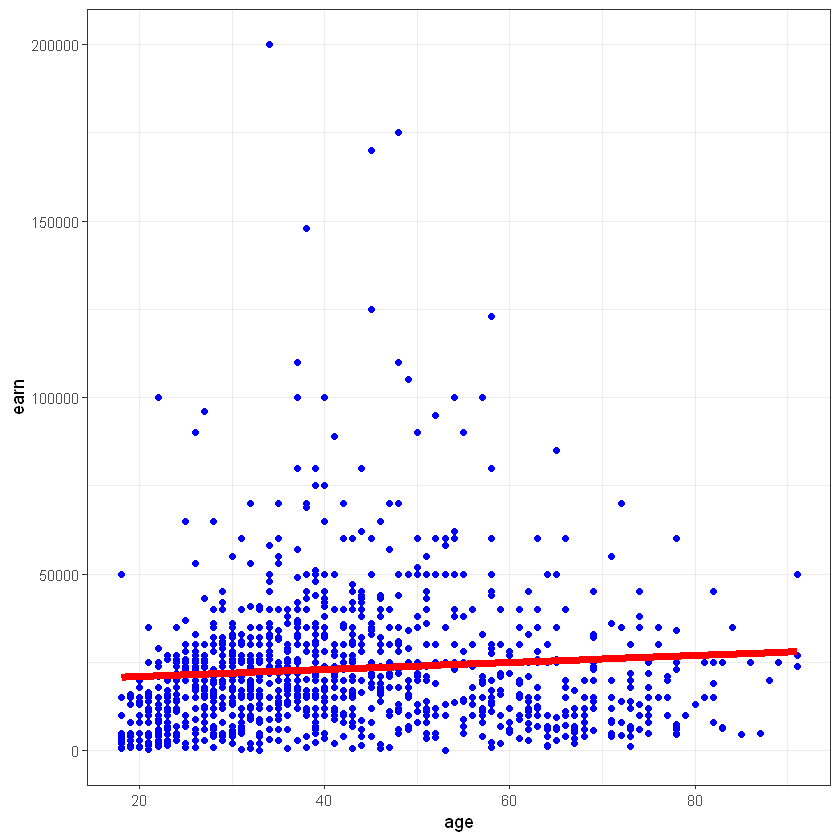

In [7]:
ggplot(data = heights_df, aes(y = earn, x = age)) +
geom_point(color='blue') +
geom_line(color='red',data = age_predict_df, aes(y=earn, x=age), size = 2) + 
theme_bw()

In [8]:
mean_earn <- mean(heights_df$earn)

**Corrected Sum of Squares Total**

In [9]:
sst <- sum((mean_earn - heights_df$earn)^2)
sst

[1] 451591883937

**Corrected Sum of Squares for Model**

In [10]:
ssm <- sum((mean_earn - age_predict_df$earn)^2)
ssm

[1] 2963111900

**Residuals**


In [11]:
residuals <- heights_df$earn - age_predict_df$earn
head(residuals)

[1]  26485.214  35192.939   8075.707  21912.549  28081.649 -12626.076

**Sum of Squares for Error**


In [12]:
sse <- sum(residuals^2)
sse

[1] 448628772037

**R Squared R^2 = SSM\SST**



In [13]:
r_squared <- ssm/sst
r_squared

[1] 0.006561482

**Number of observations**

In [14]:
n <- nrow(heights_df)
n

[1] 1192

**Number of regression parameters**

In [15]:
p <- 2
p

[1] 2

**Corrected Degrees of Freedom for Model (p-1)**


In [16]:
dfm <- p - 1
dfm

[1] 1

**Degrees of Freedom for Error (n-p)**

In [17]:
dfe <- n - p
dfe

[1] 1190


**Corrected Degrees of Freedom Total:   DFT = n - 1**


In [18]:
dft <- n - 1
dft

[1] 1191

**Mean of Squares for Model:   MSM = SSM / DFM**


In [19]:
msm <- ssm / dfm
msm

[1] 2963111900

**Mean of Squares for Error:   MSE = SSE / DFE**

In [20]:
mse <- sse / dfe
mse

[1] 376998968

**Mean of Squares Total:   MST = SST / DFT**


In [21]:
mst <- sst / dft
mst

[1] 379170348

**F Statistic F = MSM/MSE**

In [22]:
f_score <- msm/mse
f_score

[1] 7.859735

**Adjusted R Squared R2 = 1 - (1 - R2)(n - 1) / (n - p)**

In [23]:
adjusted_r_squared <- 1 -(1 - r_squared)*(n - 1) / (n - p)
adjusted_r_squared

[1] 0.005726659

**Calculate the p-value from the F distribution**

In [24]:
p_value <- pf(f_score, dfm, dft, lower.tail=F)
p_value

[1] 0.005136826